In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


**Data importation and Analysis**

In [2]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#import pandas_profiling
#df.profile_report()

*Dropping Id, because is not important*

In [4]:
df.drop(columns = 'Id', inplace = True)
df_test.drop(columns = 'Id', inplace = True)

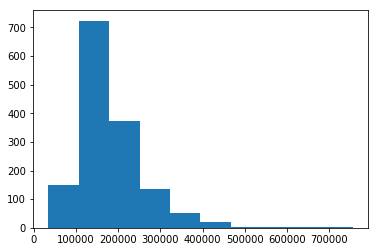

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df['SalePrice'])
plt.show()

**Missing Values**

In [6]:
df.columns[df.isnull().sum() > 0]   

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [7]:
median1 = df['LotFrontage'].median()
df['LotFrontage'].fillna(median1, inplace = True)
df['LotFrontage'].isnull().sum()

df_test['LotFrontage'].fillna(median1, inplace = True)

In [8]:
df['Alley'].fillna('none', inplace = True)
df.Alley.isnull().sum()

df_test['Alley'].fillna('none', inplace = True)

In [9]:
df[df['MasVnrType'].isnull()]['MasVnrType']

234     NaN
529     NaN
650     NaN
936     NaN
973     NaN
977     NaN
1243    NaN
1278    NaN
Name: MasVnrType, dtype: object

In [10]:
df['MasVnrType'].fillna('None', inplace = True)
df_test['MasVnrType'].fillna('None', inplace = True)

In [11]:
df[df['MasVnrType']=='None']['MasVnrType']

1       None
3       None
5       None
8       None
9       None
        ... 
1454    None
1455    None
1457    None
1458    None
1459    None
Name: MasVnrType, Length: 872, dtype: object

In [12]:
df.BsmtQual.isnull().sum()
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [13]:
df.BsmtQual.isnull().sum()

37

In [14]:
df['BsmtQual'].fillna('None', inplace = True)
df['BsmtQual'].value_counts()
df_test['BsmtQual'].fillna('None', inplace = True)

In [15]:
df['BsmtCond'].value_counts()
df.BsmtCond.isnull().sum()

37

In [16]:
df['BsmtCond'].fillna('None', inplace = True)
df['BsmtCond'].value_counts()
df_test['BsmtCond'].fillna('None', inplace = True)

In [17]:
df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [18]:
df['BsmtExposure'].fillna('None', inplace = True)
df['BsmtExposure'].value_counts()
df_test['BsmtExposure'].fillna('None', inplace = True)

In [19]:
df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [20]:
df['BsmtFinType1'].fillna('None', inplace = True)
df['BsmtFinType1'].value_counts()
df_test['BsmtFinType1'].fillna('None', inplace = True)

In [21]:
df['BsmtFinType2'].fillna('None', inplace = True)
df['BsmtFinType2'].value_counts()
df_test['BsmtFinType2'].fillna('None', inplace = True)

In [22]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [23]:
df.Electrical.isnull().sum()

1

In [24]:
df[df.Electrical.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,80,RL,73.0,9735,Pave,none,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [25]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [26]:
df.Electrical.fillna('SBrkr', inplace = True)
df.Electrical.isnull().sum()
df_test.Electrical.fillna('SBrkr', inplace = True)

In [27]:
df.columns[df.isnull().sum() > 0]   

Index(['MasVnrArea', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [28]:
df.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [29]:
df.MasVnrArea.fillna(0, inplace = True)
df_test.MasVnrArea.fillna(0, inplace = True)

In [30]:
df.columns[df.isnull().sum() > 0]   

Index(['FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [31]:
df.FireplaceQu.fillna('none', inplace = True)
df.GarageType.fillna('none', inplace = True)

df_test.FireplaceQu.fillna('none', inplace = True)
df_test.GarageType.fillna('none', inplace = True)

In [32]:
df.GarageYrBlt.fillna(0, inplace = True)

df_test.GarageYrBlt.fillna(0, inplace = True)

In [33]:
df.GarageFinish.fillna('none', inplace = True)
df.GarageQual.fillna('none', inplace = True)
df.GarageCond.fillna('none', inplace = True)
df.PoolQC.fillna('none', inplace = True)
df.Fence.fillna('none', inplace = True)
df.MiscFeature.fillna('none', inplace = True)

df_test.GarageFinish.fillna('none', inplace = True)
df_test.GarageQual.fillna('none', inplace = True)
df_test.GarageCond.fillna('none', inplace = True)
df_test.PoolQC.fillna('none', inplace = True)
df_test.Fence.fillna('none', inplace = True)
df_test.MiscFeature.fillna('none', inplace = True)

In [34]:
df.columns[df.isnull().sum() > 0]   

Index([], dtype='object')

In [35]:
df_test.columns[df_test.isnull().sum() > 0]   

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea',
       'SaleType'],
      dtype='object')

In [36]:
df_test.isnull().sum()

MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 79, dtype: int64

In [37]:
df.MSZoning.mode()

0    RL
dtype: object

In [38]:
df_test.MSZoning.fillna('RL', inplace = True)

In [39]:
df.Utilities.mode()

0    AllPub
dtype: object

In [40]:
df_test.Utilities.fillna('AllPub', inplace = True)

In [41]:
df.Exterior1st.mode()

0    VinylSd
dtype: object

In [42]:
df_test.Exterior1st.fillna('VinylSd', inplace = True)

In [43]:
df_test.columns[df_test.isnull().sum() > 0]   

Index(['Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
       'GarageCars', 'GarageArea', 'SaleType'],
      dtype='object')

In [44]:
df.Exterior2nd.mode()

0    VinylSd
dtype: object

In [45]:
df_test.Exterior2nd.fillna('VinylSd', inplace = True)

In [46]:
df.BsmtFinSF1

0       706
1       978
2       486
3       216
4       655
       ... 
1455      0
1456    790
1457    275
1458     49
1459    830
Name: BsmtFinSF1, Length: 1460, dtype: int64

In [47]:
# BsmtFinSF1
# BsmtFinSF2
# BsmtUnfSF
# TotalBsmtSF
# BsmtFullBath
# BsmtHalfBath

In [48]:
df_test[df_test.BsmtFinSF2.isnull()]['BsmtFinType2']

660    None
Name: BsmtFinType2, dtype: object

In [49]:
df_test.BsmtFinSF1.fillna(0, inplace = True)
df_test.BsmtFinSF2.fillna(0, inplace = True)
df_test.BsmtUnfSF.fillna(0, inplace = True)
df_test.TotalBsmtSF.fillna(0, inplace = True)
df_test.BsmtFullBath.fillna(0, inplace = True)
df_test.BsmtHalfBath.fillna(0, inplace = True)

In [50]:
df_test.columns[df_test.isnull().sum() > 0]   

Index(['KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType'], dtype='object')

In [51]:
df_test[df_test.KitchenQual.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
95,50,RL,72.0,10632,Pave,none,IR1,Lvl,AllPub,Inside,...,0,0,none,none,none,0,1,2010,COD,Normal


In [52]:
df.KitchenQual.mode()

0    TA
dtype: object

In [53]:
df_test.KitchenQual.fillna('TA', inplace = True)

In [54]:
df_test.Functional.fillna('Typ', inplace = True)

In [55]:
df_test.GarageCars.isnull().sum()

1

In [56]:
df_test[df_test.GarageCars.isnull()]['GarageType']

1116    Detchd
Name: GarageType, dtype: object

In [57]:
df_test.GarageCars.fillna(0, inplace =True)
df_test.GarageArea.fillna(0, inplace =True)

In [58]:
df_test.SaleType.isnull().sum()

1

In [59]:
df_test[df_test.SaleType.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1029,20,RL,85.0,13770,Pave,none,Reg,Lvl,AllPub,Corner,...,0,0,none,none,none,0,10,2007,NaN,Normal


In [60]:
df.SaleType.mode()

0    WD
dtype: object

In [61]:
df_test.SaleType.fillna('WD', inplace = True)

In [62]:
df_test.columns[df_test.isnull().sum() > 0] 

Index([], dtype='object')

**Numeric X Factor**

In [63]:
for i in range(len(df.columns)):
    a = df.iloc[i,]
    b= a.str.isnumeric()

In [64]:
type(b)

pandas.core.series.Series

In [65]:
b.fillna(True, inplace = True)

In [66]:
col_num = b[b == True].index
col_num[:-1]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [67]:
col_factor = b[b == False].index

In [68]:
col_factor

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [69]:
df_num = df[col_num[:-1]].copy()
df_test_num = df_test[col_num[:-1]].copy()
df_num_colname = df_num.columns
df_num_colname
df_test_num_colname = df_test_num.columns
df_test_num_colname

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [70]:
df_factor = df[col_factor].copy()
df_factor_colname = df_factor.columns
df_test_factor = df_test[col_factor].copy()
df_test_factor_colname = df_test_factor.columns
len(df_test_factor_colname)
df_factor.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
1,RL,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
2,RL,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
3,RL,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,none,none,none,WD,Abnorml
4,RL,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal


**Stantardization**

In [71]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

In [72]:
scaler.fit(df_num)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [73]:
df_num_std = scaler.transform(df_num)
df_test_num_std = scaler.transform(df_test_num)

scaler


StandardScaler(copy=True, with_mean=True, with_std=True)

In [74]:
df_num_ = pd.DataFrame(data = df_num_std, columns = df_num_colname)
df_num_test_ = pd.DataFrame(data = df_test_num_std , columns = df_test_num_colname)

In [75]:
df_num_.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


In [76]:
SalePrice = df[col_num[-1]]
SalePrice = pd.DataFrame(SalePrice)

In [77]:
train = pd.DataFrame()
test = pd.DataFrame()

In [78]:
train.head()

""


In [79]:
type(df_num_)

pandas.core.frame.DataFrame

In [80]:
type(df_factor)

pandas.core.frame.DataFrame

In [81]:
df_factor.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
1,RL,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
2,RL,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
3,RL,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,none,none,none,WD,Abnorml
4,RL,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal


In [82]:
train = pd.concat([df_factor,df_num_], axis = 1)
test = pd.concat([df_test_factor, df_num_test_], axis = 1)

In [83]:
train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,RL,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,RL,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,RL,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,RL,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


In [84]:
train = pd.concat([train, SalePrice], axis = 1)

In [85]:
train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,208500
1,RL,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,181500
2,RL,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,223500
3,RL,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,140000
4,RL,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,250000


In [86]:
train.drop(columns = 'SalePrice', inplace = True)

In [87]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

train_dummy = pd.get_dummies(train) #Is needed get dummy variables to run the model
clf.fit(train_dummy, SalePrice)
train_dummy.info()

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 302 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(36), uint8(266)
memory usage: 790.0 KB


In [88]:
test_dummy.info()

NameError: name 'test_dummy' is not defined

In [89]:
y_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [90]:
test_dummy = pd.get_dummies(test)


In [91]:
col_train = train_dummy.columns
col_test = test_dummy.columns

In [92]:
col_train.value_counts()
empty = pd.DataFrame(columns = col_train)
empty.head

<bound method NDFrame.head of Empty DataFrame
Columns: [MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, MSZoning_C (all), MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Grvl, Street_Pave, Alley_Grvl, Alley_Pave, Alley_none, LotShape_IR1, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_Bnk, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_AllPub, Utilities_NoSeWa, LotConfig_Corner, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Gtl, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blmngtn, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighbo

In [93]:
test_dummy = pd.concat([test_dummy, empty]) #The train dataset has more columns than the test dataset because of transformation
test_dummy.fillna(0, inplace = True)        #to dummy variable, so I get only the names of train dataset and included 
test_dummy.info()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 302 entries, 1stFlrSF to YrSold
dtypes: float64(36), int64(266)
memory usage: 3.4 MB


In [94]:
y_pred = clf.predict(test_dummy)

In [95]:
print(y_pred)

[172500 113000 250000 ... 250000 147000 141000]


In [96]:
my_submission = pd.DataFrame(y_pred)

In [97]:
my_submission.to_csv('submission.csv', index = False)